In [4]:
import spacy
from spacy import displacy
from spacy.lang.pt.stop_words import STOP_WORDS
#pip install spacy=2.2.3
#print(spacy .__version__)
import nltk

import pandas as pd
import string
import random
import seaborn as sns
import numpy as np

2.2.3


In [3]:
#marcação part-of-speech (substantivo, adjetivos, verbos)
    #identifica cada entidade das palavras em uma frase

#objeto principal para trabalhar com PLN em portugues
pln = spacy.load('pt_core_news_sm')

#texto para processamento
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitiba')

#CADA PALAVRA DE UMA FRASE É CHAMADA DE TOKEN
for token in documento:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curitiba PROPN


In [5]:
#legendas dos tokens
for token in documento:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
         token.shape_, token.is_alpha, token.is_stop)

Estou Estou AUX <aux>|V|PR|1S|IND|@FS-STA aux Xxxxx True True
aprendendo aprender VERB <mv>|V|GER|@ICL-AUX< ROOT xxxx True False
processamento processamento NOUN <np-idf>|N|M|S|@<ACC obj xxxx True False
de de ADP PRP|@N< case xx True True
linguagem linguagem NOUN <np-idf>|N|F|S|@P< nmod xxxx True False
natural natural ADJ ADJ|F|S|@N< amod xxxx True False
, , PUNCT PU|@PU punct , False False
curso cursar NOUN <np-idf>|N|M|S|@N<PRED appos xxxx True False
em em ADP PRP|@N< case xx True True
Curitiba Curitiba PROPN PROP|M|S|@P< nmod Xxxxx True False


In [6]:
#buscando palavras que são pronomes (PROPN)
for token in documento:
    if token.pos_ == 'PROPN':
        print(token.text)

Curitiba


In [7]:
#lematização -> palavra com está no dicionário
for token in documento:
    print(token.text, token.lemma_)

Estou Estou
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso cursar
em em
Curitiba Curitiba


In [8]:
doc = pln('encontrei encontraram encontrarão encontraria')
[token.lemma_ for token in doc]

['encontrar', 'encontrar', 'encontrar', 'encontrar']

In [9]:
#stematização -> radical da palavra
    #desvantagem: palavras diferentes com mesmo radical
stemmer = nltk.stem.RSLPStemmer()

stemmer.stem('aprendendo')

'aprend'

In [10]:
for token in documento:
    print(token.text, token.lemma_, stemmer.stem(token.text))

Estou Estou est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso cursar curs
em em em
Curitiba Curitiba curitib


In [11]:
#reconhecimento entidades nomeadas
texto = 'A IBM é uma empresa dos Estados Unidos voltada para a área de informática. Sua sede no Brasil fica em São Paulo e a receita em 2018 foi de aproximadamente 320 bilhões de reais'

documento = pln(texto)

#imprime todas as entidades que ele localizou no texto informado
for entidade in documento.ents:
    print(entidade.text, entidade.label_)
    

IBM ORG
Estados Unidos LOC
Brasil LOC
São Paulo LOC


In [12]:
#Apresentando entidades de outra maneira...
displacy.render(documento, style = 'ent', jupyter=True)

In [13]:
texto = 'Bill Gates nasceu em Seattle em 28/10/1955 e foi o criador da Microsoft'

documento = pln(texto)

#imprime todas as entidades que ele localizou no texto informado
for entidade in documento.ents:
    print(entidade.text, entidade.label_)

Bill Gates PER
Seattle LOC
Microsoft ORG


In [14]:
#Apresentando entidades de outra maneira...
displacy.render(documento, style = 'ent', jupyter=True)

In [15]:
#filtrar todas as pessoas de um texto
for entidade in documento.ents:
    if entidade.label_ == 'PER':
        print(entidade.text)

Bill Gates


In [16]:
#stop words -> palavras que não apresentam significados
#variavel que foi importada com o pacote pt-br de stop words

#print(STOP_WORDS)
#print(len(STOP_WORDS))

#verificação se uma palavra é stop word
print(pln.vocab['ir'].is_stop)
print(pln.vocab['caminhar'].is_stop)

True
False


In [17]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitiba')

#não stop words
for token in documento:
    if not pln.vocab[token.text].is_stop:
        print(token.text)

aprendendo
processamento
linguagem
natural
,
curso
Curitiba


In [18]:
#parsing de dependência 01 (relação de antecessores)
documento = pln('reserve uma passagem saindo de Guarulhos e chegando em Curitiba')

#Guarulhos
origem = documento[5]
#Curitiba
destino = documento[9]

#antecessores
print(list(origem.ancestors))
print(list(destino.ancestors))

#verificando se uma palavra é antecessora
print(documento[0].is_ancestor(documento[2]))

[passagem, reserve]
[chegando, reserve]
True


In [19]:
#parsing de dependência 02 (padrões em textos)

documento = pln('Reserva de uma mesa para o restaurante e de um táxi para o hotel')

#separação das palavras (feito de maneira manual)
tarefas = documento[3], documento[10]
locais = documento[6], documento[13]
print(tarefas)
print(locais)

#imprime os locais contidos no texto
for local in locais:
    print("----------", local)
    #imprime os antecessores de cada local do texto
    for objeto in local.ancestors:
        print(objeto)
        
print()        
print()
print()
        
#imprime os locais contidos no texto
for local in locais:
    print("----------", local)
    #imprime os antecessores de cada local do texto
    for objeto in local.ancestors:
        #se o objeto estiver contido na lista de tarefas gerado acima (mesa, táxi)
        if objeto in tarefas:
            print("Reserva de {} é para o {}".format(objeto, local))        
            break

print()
print()
print()

#palavra que vem depois...
print(list(documento[6].children))

(mesa, táxi)
(restaurante, hotel)
---------- restaurante
mesa
Reserva
---------- hotel
táxi
restaurante
mesa
Reserva



---------- restaurante
Reserva de mesa é para o restaurante
---------- hotel
Reserva de táxi é para o hotel



[para, o, táxi]


In [20]:
#parsing de dependência 03 (visualização dads relações das palavras em um texto)

documento = pln('Reserva de uma mesa para o restaurante e de um táxi para o hotel')
#diplacy no spyder -> displacy.serve(documento, style='dep')
print(displacy.render(documento, style = 'dep', jupyter=True, options={'distance':90}))

print()
print()
print()

print(list(documento[3].ancestors))

print()
print()
print()

print(list(documento[3].children))

None



[Reserva]



[de, uma, restaurante]


In [21]:
#parsing de dependência 04 (visualização dads relações das palavras em um texto)

documento = pln('Que locais podemos visitar em Curitiba e para ficar em Guarulhos?')

lugares = documento[5], documento[10]
acoes = documento[3], documento[8]

print(lugares)
print(acoes)

print()
print()
print()

#verifica a relação de lugares e a ação para este lugar
#percorre lista de lugares
for local in lugares:
    #pega os antecessores dos lugares
    for acao in local.ancestors:
        #se a acao, da lista do antecessor do local atual, estiver na lista de ações que foi definido acima
        if acao in acoes:
            print("{} para {}".format(local,acao))
            break

#vizualizar dependências
print(displacy.render(documento, style = 'dep', jupyter=True, options={'distance':90}))

(Curitiba, Guarulhos)
(visitar, ficar)



Curitiba para visitar
Guarulhos para ficar


None


In [22]:
#verificar se palavras são semelhantes ou logicamente relacionadas

p1 = pln("olá")
p2 = pln("oi")
p3 = pln("ou")

print(p1.similarity(p2))
print(p2.similarity(p1))
print(p1.similarity(p3))
print(p2.similarity(p3))

0.8258470163434681
0.8258470163434681
0.556686068341704
0.5912281781129909


C:\ProgramData\Anaconda3\lib\runpy.py:194: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return _run_code(code, main_globals, None,
C:\ProgramData\Anaconda3\lib\runpy.py:194: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, o

In [23]:
texto1 = pln('Quando será lançado o novo filme?')
texto2 = pln('O novo filme será lançado mês que vem')
texto3 = pln('Qual a cor do carro?')

print(texto1.similarity(texto2))
print(texto1.similarity(texto3))

0.7954250810111715
0.6686738983069148


C:\ProgramData\Anaconda3\lib\runpy.py:194: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return _run_code(code, main_globals, None,
C:\ProgramData\Anaconda3\lib\runpy.py:194: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, o

In [24]:
texto = pln('gato cachorro pessoa')

for texto1 in texto:
    print("------", texto1)
    for texto2 in texto:
        print(texto2)
        similaridade = int(texto1.similarity(texto2)*100)
        print("{} é {} similar a {}".format(texto1, similaridade, texto2))

------ gato
gato
gato é 100 similar a gato
cachorro
gato é 44 similar a cachorro
pessoa
gato é 22 similar a pessoa
------ cachorro
gato
cachorro é 44 similar a gato
cachorro
cachorro é 100 similar a cachorro
pessoa
cachorro é 45 similar a pessoa
------ pessoa
gato
pessoa é 22 similar a gato
cachorro
pessoa é 45 similar a cachorro
pessoa
pessoa é 100 similar a pessoa


C:\ProgramData\Anaconda3\lib\runpy.py:194: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return _run_code(code, main_globals, None,
C:\ProgramData\Anaconda3\lib\runpy.py:194: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vector

In [25]:
#tokenização -> separar cada palavra de um texto em um formato correto

#texto para processamento
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitiba')

#exemplo
for token in documento:
    print(token)

Estou
aprendendo
processamento
de
linguagem
natural
,
curso
em
Curitiba


In [26]:
#exemplo 2
    #não pegou a vírgula como token
documento1 = 'Estou aprendendo processamento de linguagem natural, curso em Curitiba'
documento1.split(' ')

['Estou',
 'aprendendo',
 'processamento',
 'de',
 'linguagem',
 'natural,',
 'curso',
 'em',
 'Curitiba']

In [27]:
##################################### CLASSIFICAÇÃO DE SENTIMENTOS #####################################
#base de dados
base_dados = pd.read_csv('base_treinamento.txt', encoding = 'utf-8')

base_dados.shape

(196, 2)

In [28]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


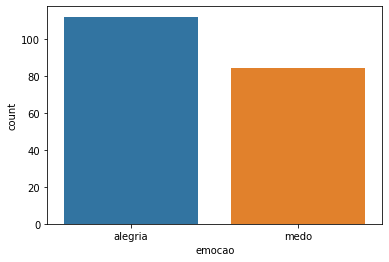

In [29]:
sns.countplot(base_dados['emocao'], label = 'Contagem');

In [30]:
# pré processamento de textos
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
stop_words = STOP_WORDS
print(stop_words)

{'fim', 'deve', 'aqui', 'vêm', 'aquilo', 'pontos', 'baixo', 'aqueles', 'maior', 'oitavo', 'ou', 'tive', 'sua', 'numa', 'dois', 'para', 'vos', 'próximo', 'adeus', 'na', 'longe', 'for', 'vens', 'quieto', 'três', 'esse', 'eu', 'atrás', 'deverá', 'tua', 'poderá', 'dezassete', 'são', 'dezanove', 'era', 'zero', 'logo', 'cuja', 'des', 'obrigado', 'vem', 'dez', 'próxima', 'somos', 'alguns', 'ser', 'pouco', 'os', 'sou', 'nem', 'elas', 'duas', 'sempre', 'perto', 'diz', 'daquela', 'em', 'tivemos', 'como', 'conhecido', 'menos', 'tivestes', 'teve', 'não', 'estas', 'tentei', 'sétimo', 'partir', 'ao', 'porquanto', 'quais', 'vós', 'certamente', 'nunca', 'geral', 'apoio', 'momento', 'lá', 'meu', 'cá', 'outros', 'quando', 'nesse', 'tente', 'ir', 'bem', 'nove', 'porém', 'tiveram', 'seria', 'sete', 'tiveste', 'por', 'à', 'as', 'pouca', 'cinco', 'vocês', 'fazemos', 'maiorias', 'área', 'ela', 'já', 'irá', 'uma', 'forma', 'dá', 'bom', 'questão', 'da', 'ver', 'corrente', 'apenas', 'quinta', 'sétima', 'falta',

In [32]:
len(stop_words)

413

In [33]:
#carrega o modelo em portugues
pln = spacy.load('pt_core_news_sm')

#percorre cada palavra do texto para processar o texto
def preprocessamento(texto):
    #converte tudo para minusculo
    texto = texto.lower()
    documento = pln(texto)
  
    lista = []
    
    #tokenização
    for token in documento:
        #lista.append(token.text)
        
        #realiza lematização das palavras
        lista.append(token.lemma_)

    #remove stopwords e pontuações
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
    #remove digitos numéricos
    #join -> une as palavras em uma frase
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

    return lista

In [34]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural cursar curitiba'

In [35]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [36]:
#base de dados sem stop words, pontuações e números
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)
base_dados.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


In [37]:
#tratamento de classes
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [38]:
type(exemplo_base_dados)

list

In [39]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [40]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [41]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [42]:
type(exemplo_base_dados[0][1])

dict

In [43]:
base_dados_final = []
#for para percorrer cada registro e colocar eles no formato: texto, classe1: booleano, classe2:booleano
    #percorre o pandas na coluna texto e insere cada valor na variável texto e ocorreo o mesmo para emocao
    #zip -> comando que permite acessar dois atributos pandas diferentes
#o dict criado neste for, inserido depois na lista, é para formatar os dados para ser inseridos no classificador
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
    #print(texto, emocao)
    if emocao == 'alegria':
        dic = ({'ALEGRIA': True, 'MEDO': False})
    elif emocao == 'medo':
        dic = ({'ALEGRIA': False, 'MEDO': True})

    base_dados_final.append([texto, dic.copy()])

In [44]:
len(base_dados_final)

196

In [45]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [46]:
base_dados_final[0][0]

'trabalhar agradável'

In [47]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [48]:
type(base_dados_final[0][1])

dict

In [49]:
#lista com dicionário dentro
    #esta lista é para ser utilizada para treinar o classificador
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

In [55]:
##### classificador

#inicializa modelo em branco em português
modelo = spacy.blank('pt')
#categorização do texto
categorias = modelo.create_pipe("textcat")
#adiciona os labels (classes) que o classificador terá que preditar
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
#definição do modelo
modelo.add_pipe(categorias)
historico = []

In [56]:
###### etapa demorada....

#treinamento do modelo
modelo.begin_training()
#ajuste da rede neural
for epoca in range(1000):
    #randomiza os dados da base de dados
    random.shuffle(base_dados_final)
    #controle do erro da rede neural
    losses = {}
    #define de quantos em quantos registro será executado o batch de atualização do treino
        #submete um batch de 30 registros, faz a regularização da rede neural
    for batch in spacy.util.minibatch(base_dados_final, 30):
        #pega cada texto para submeter ao modelo para tentar fazer a previsão do erro
        textos = [modelo(texto) for texto, entities in batch]
        #verificação da lista dos valores (texto) e categoria
        annotations = [{'cats': entities} for texto, entities in batch]
        #ajuste dos pesos na rede neural
        modelo.update(textos, annotations, losses=losses)
    #imprime erro
    if epoca % 100 == 0:
        print(losses)
        historico.append(losses)

{'textcat': 0.006240023300051689}
{'textcat': 1.8791717781851958e-07}
{'textcat': 6.957147458130919e-08}
{'textcat': 2.6223058391394716e-08}
{'textcat': 1.6390291901480225e-08}
{'textcat': 8.855012334496593e-09}
{'textcat': 6.058883283976968e-09}
{'textcat': 6.3740124844891e-09}
{'textcat': 4.224377431194526e-09}
{'textcat': 3.830431777318566e-09}


In [60]:
#lista de somente os valores dos erros
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [62]:
#converte para np.array para gerar o gráfico
historico_loss = np.array(historico_loss)
historico_loss

array([6.24002330e-03, 1.87917178e-07, 6.95714746e-08, 2.62230584e-08,
       1.63902919e-08, 8.85501233e-09, 6.05888328e-09, 6.37401248e-09,
       4.22437743e-09, 3.83043178e-09])

Text(0, 0.5, 'Erro')

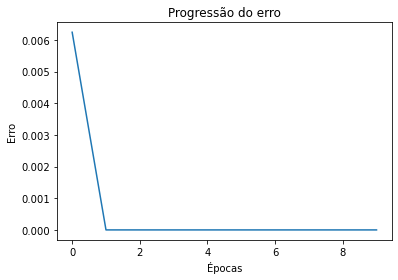

In [63]:
#gráfico com os erros
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [64]:
#salva o modelo em disco 
    #não precisa treinar o modelo novamente
modelo.to_disk("modelo")